<a href="https://colab.research.google.com/github/sandhiyasuriya/Final-project-1/blob/main/E_commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
     

loading dataset

In [ ]:
rawdata = pd.read_excel("/content/cust_data.xlsx")
rawdata.head(4)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=rawdata.copy(deep=True)

EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
data.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [ ]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
data.shape

(30000, 38)

In [ ]:
missing_values=data.isnull().sum()
missing_values

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
data['Gender'].isnull().sum()

2724

In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data.isnull().sum().sum()

0

In [ ]:
data['Gender'].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

In [ ]:
data.drop(columns = ['Cust_ID'], inplace = True)

In [ ]:
data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,F,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
newmissing_value=data.isnull().sum()
newmissing_value

Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix           

Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


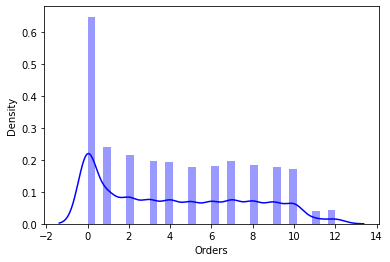

In [ ]:
sns.distplot(data['Orders'],color='b')

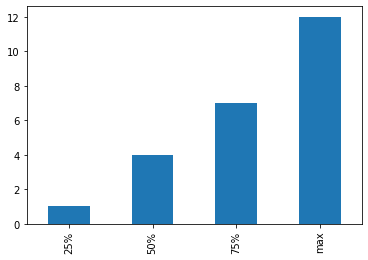

In [ ]:
data.Orders.describe()[4:].plot(kind='bar')

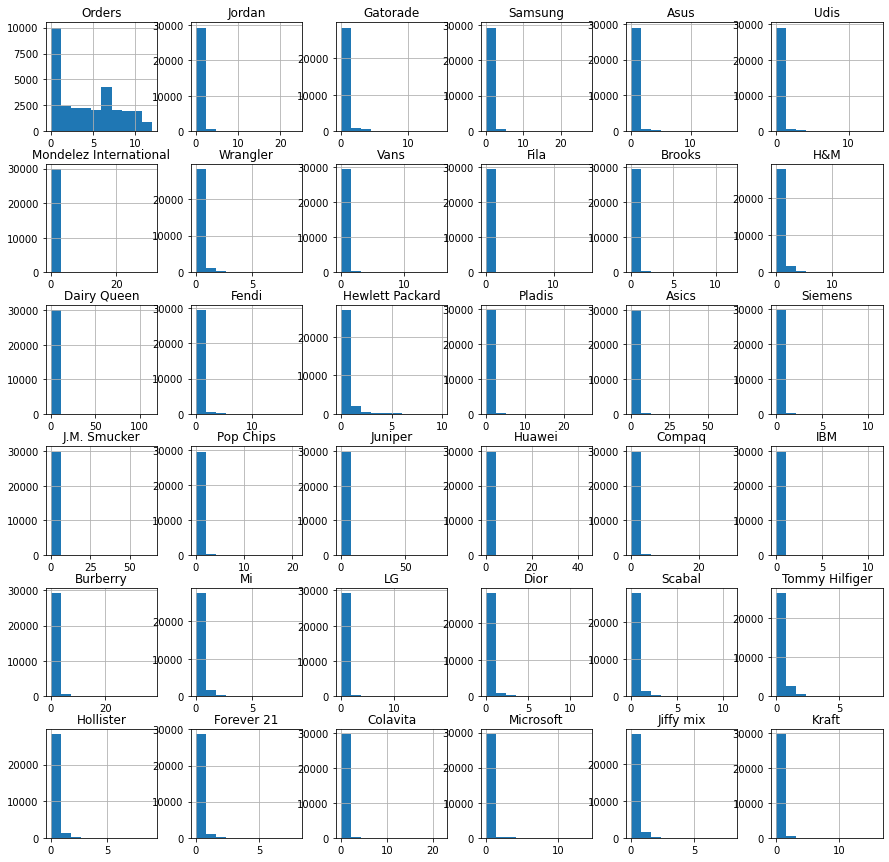

In [ ]:
fig=data.hist(figsize=(15,15))

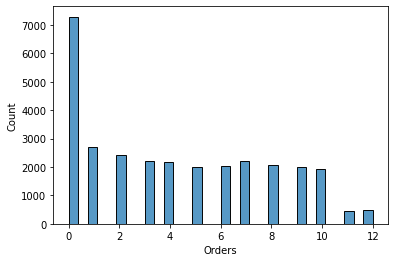

In [ ]:
sns.histplot(x='Orders', data=data)

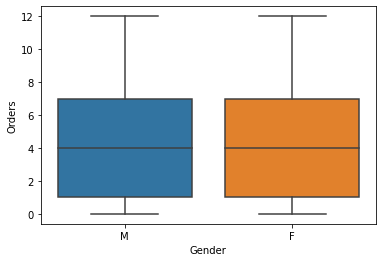

In [ ]:
sns.boxplot( x="Gender", y='Orders', data=data)

Standardisation

In [ ]:
data1=pd.get_dummies(data,columns=['Gender'])
data1.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,0


In [ ]:
data2=data1.drop(['Orders','Gender_F','Gender_M'],axis=1)
data2.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
scale=StandardScaler()
data=scale.fit_transform(data2)
data

array([[-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ...,  1.97870833,
        -0.22048554, -0.18277495],
       ...,
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 2.15288625, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495]])

In [ ]:
data1.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_F',
       'Gender_M'],
      dtype='object')

In [ ]:
X=pd.DataFrame(data,columns=data1.columns[1:36])
X

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,1.824571,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


Applying K-Means Algorithm

Build a Model with multiple K_means

In [ ]:
X

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,1.824571,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


In [ ]:
n_clusters=[2,3,4,5,6,7]
for k in n_clusters:
    cluster=KMeans(k)
    predict=cluster.fit_predict(X)
    score=silhouette_score(X,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 2, silhouette score is 0.4226384157976343)
For n_clusters = 3, silhouette score is 0.28853213393378263)
For n_clusters = 4, silhouette score is 0.28713324613969715)
For n_clusters = 5, silhouette score is 0.27342352845767204)
For n_clusters = 6, silhouette score is 0.21935638183968884)
For n_clusters = 7, silhouette score is 0.206375132774359)


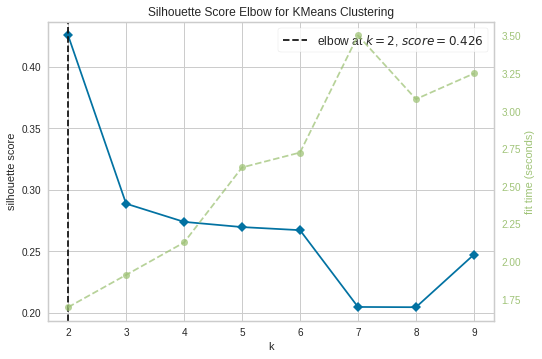

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Here its we are using silhoutte score Elbow Visualizer it says that kMeans Cluster is 2

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
     

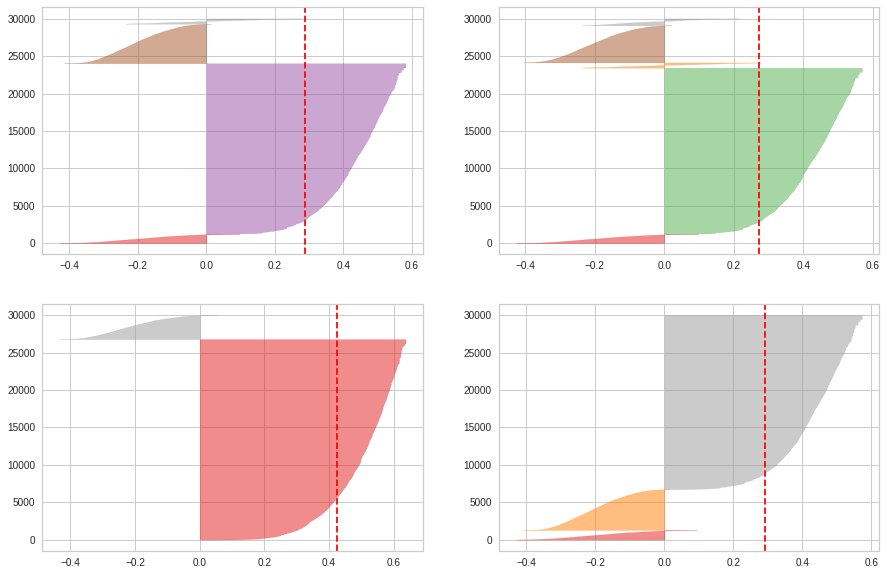

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
for i in [2,3,4,5]:
    
    km = KMeans(n_clusters=i,random_state=10)
    q, mod = divmod(i, 2)     
    visualizer = SilhouetteVisualizer(km, ax=ax[q-2][mod])
    visualizer.fit(X)

By the SilhouetteVisualizer we can see the cluster 3 have the clear cluster samples

**Using Elbow Method For Kmeans**

/usr/local/lib/python3.8/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


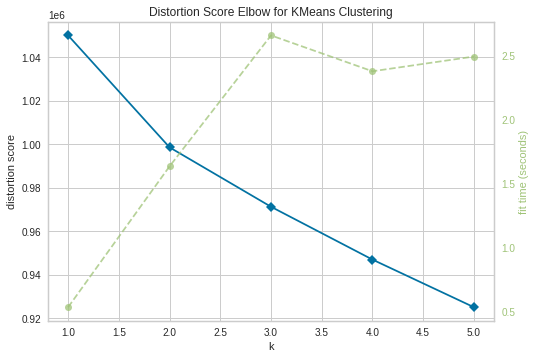

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure
     

In [ ]:
inertia = []
for i in range(1,10):
  model = KMeans(i)
  model.fit(X)
  wcss=model.inertia_     # Within-Cluster-Sum of Squared Errors(WCSS)
  inertia.append(wcss)
print(inertia)

[1050000.0000000026, 998538.5274325162, 971221.3576837012, 946451.6988563279, 922306.2377944973, 902605.0482718325, 880989.8556422627, 863241.8878373458, 847953.5718799118]


From the Elbow method we can find that the sudden fall at the cluster point 2 and there is a slight bend which is Elbow which is cluster 3. Now we can finally conclude from all the methods we can take cluster "K=3"

In [ ]:
df=rawdata.iloc[:,3:]
df.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
model=KMeans(3)
cluster=model.fit_predict(df)  
cluster

array([2, 0, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
df['cluster']=cluster
df

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Text(0.5, 1.0, 'Size of clusters')

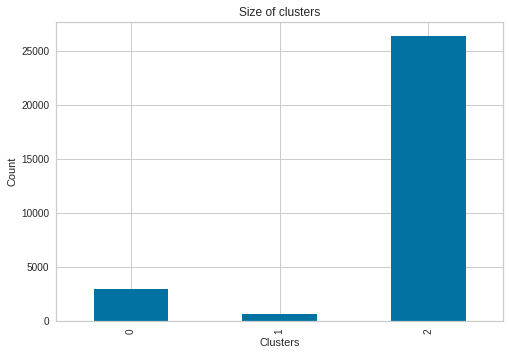

In [ ]:
df.cluster.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Size of clusters')

cluster center

The cluster center gives informaion about the the variables belonging to the clusters

In [ ]:
model.cluster_centers_
     

array([[0.58101308, 0.50083864, 0.45454545, 0.27474002, 0.24354244,
        0.25092251, 0.20764844, 0.2230795 , 0.16101979, 0.35491446,
        0.87151962, 1.22744046, 0.33243878, 0.28346193, 0.61422341,
        1.36363636, 0.17074807, 2.47534384, 0.84267024, 0.67661858,
        0.45823549, 0.13250587, 0.03388125, 2.2868165 , 0.28144918,
        0.41395505, 0.66018115, 0.6709158 , 0.49446494, 0.16470983,
        0.1402214 , 0.56155652, 0.26568266, 0.290842  , 0.31365314],
       [0.29635258, 0.27051672, 0.20212766, 0.18389058, 0.16109422,
        0.1550152 , 0.12158055, 0.10182371, 0.09118541, 0.17477204,
        0.36930091, 0.25227964, 0.15653495, 0.1550152 , 0.10030395,
        0.40425532, 0.03951368, 0.98024316, 0.30851064, 6.24620061,
        1.36322188, 1.22340426, 0.26899696, 0.46200608, 0.15197568,
        0.11702128, 0.25683891, 0.38297872, 0.23860182, 0.06231003,
        0.04407295, 0.43617021, 0.33890578, 0.14133739, 0.07598784],
       [0.23125071, 0.22377755, 0.19726111, 0.

In [ ]:
cluster_center=pd.DataFrame(model.cluster_centers_,columns=df.columns[:35])
cluster_center

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.581013,0.500839,0.454545,0.274740,0.243542,0.250923,0.207648,0.223080,0.161020,0.354914,...,0.413955,0.660181,0.670916,0.494465,0.164710,0.140221,0.561557,0.265683,0.290842,0.313653
1,0.296353,0.270517,0.202128,0.183891,0.161094,0.155015,0.121581,0.101824,0.091185,0.174772,...,0.117021,0.256839,0.382979,0.238602,0.062310,0.044073,0.436170,0.338906,0.141337,0.075988
2,0.231251,0.223778,0.197261,0.147946,0.131786,0.126816,0.095178,0.099048,0.086795,0.114980,...,0.066955,0.227495,0.335723,0.119039,0.068207,0.048291,0.144342,0.093927,0.063768,0.043322


In [ ]:
df.cluster.value_counts().sort_index()

0     2978
1      658
2    26364
Name: cluster, dtype: int64

In [ ]:
cluster_1=sorted(zip(list(cluster_center.iloc[0,:]),list(cluster_center.columns)),reverse=True)[:15]
cluster_1
     

[(2.4753438443475226, 'J.M. Smucker'),
 (2.2868165045287108, 'Burberry'),
 (1.363636363636333, 'Asics'),
 (1.227440456222773, 'Dairy Queen'),
 (0.8715196242871426, 'H&M'),
 (0.8426702448842752, 'Pop Chips'),
 (0.6766185843676598, 'Juniper'),
 (0.6709158000670861, 'Scabal'),
 (0.6601811472660187, 'Dior'),
 (0.6142234149614246, 'Pladis'),
 (0.5810130828581055, 'Jordan'),
 (0.5615565246561498, 'Colavita'),
 (0.5008386447500784, 'Gatorade'),
 (0.49446494464944224, 'Tommy Hilfiger'),
 (0.45823549144582476, 'Huawei')]

In this cluster 2978 customers are segmented in a group which is aligned by Fashion and Lifestyle

In [ ]:
cluster_2=sorted(zip(list(cluster_center.iloc[1,:]),list(cluster_center.columns)),reverse=True)[:15]
cluster_2

[(6.246200607902755, 'Juniper'),
 (1.3632218844984823, 'Huawei'),
 (1.223404255319153, 'Compaq'),
 (0.980243161094224, 'J.M. Smucker'),
 (0.46200607902735585, 'Burberry'),
 (0.4361702127659577, 'Colavita'),
 (0.4042553191489367, 'Asics'),
 (0.3829787234042554, 'Scabal'),
 (0.3693009118541035, 'H&M'),
 (0.33890577507598857, 'Microsoft'),
 (0.30851063829787234, 'Pop Chips'),
 (0.29635258358662625, 'Jordan'),
 (0.2705167173252281, 'Gatorade'),
 (0.2689969604863224, 'IBM'),
 (0.25683890577507534, 'Dior')]

In the second cluster 658 customers are segmented in a group which is aligned most likely by IT & Electronics

In [ ]:
cluster_3=sorted(zip(list(cluster_center.iloc[2,:]),list(cluster_center.columns)),reverse=True)[:15]
cluster_3

[(0.5546071848564041, 'J.M. Smucker'),
 (0.33572322749517547, 'Scabal'),
 (0.3034027540685307, 'Juniper'),
 (0.2657334698987017, 'H&M'),
 (0.2312507112780276, 'Jordan'),
 (0.2274951633094421, 'Dior'),
 (0.22377755016880338, 'Gatorade'),
 (0.2169872159630115, 'Burberry'),
 (0.20776905276734112, 'Huawei'),
 (0.19726110542088193, 'Samsung'),
 (0.1791282576533602, 'Pop Chips'),
 (0.17738325556690615, 'Asics'),
 (0.1479458290656601, 'Asus'),
 (0.14741474147414593, 'Hewlett Packard'),
 (0.14434202040893604, 'Colavita')]

In the third cluster 26364 customers are segmented in a group which is aligned most likely by Groceries,Foods and Snacks Products

**Conclusion:**

  After using the Silhouette Score method and analyzing, we have found that k=3 is the optimal score. Hence we have segmented the customer data into 4 clusters. We have applied K Means algorithm with 3 clusters and classified the customers under four categories namely Snacks,Foods,Groceries,lifestyle and Fashion, Electronics & Appliances, Mobiles & Computers. Each cluster gives us information on the market trend and the customer interests. The segmentation can help e-commerce organizations in marketing their products to specific set of customers and provide recommendations to customers on their mobile apps or websites based on their specific interests.